# Midterm project ML Zoomcamp 2022

## Data

### Origin of the data

The Data is taken from the UCI Machine Learning Repository.

The link is: https://archive-beta.ics.uci.edu/ml/datasets/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition#Abstract

Cite: Estimation of obesity levels based on eating habits and physical condition . (2019). UCI Machine Learning Repository.

BibTex: @misc{misc_estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition__544,
  title        = {{Estimation of obesity levels based on eating habits and physical condition }},
  year         = {2019},
  howpublished = {UCI Machine Learning Repository}
}

License:This dataset is licensed under a Creative Commons Attribution 4.0 International (CC BY 4.0) license.
This allows for the sharing and adaptation of the datasets for any purpose, provided that the appropriate credit is given.

### Description of the data

This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition.

- Dataset Characteristics:Multivariate
- Subject Area: Life
- Associated Tasks: Classification, Regression, Clustering
- Attribute Type: N/A
- Instances: 2111
- Attributes: N/A

In the study the reasearchers used the following attributes - see https://www.researchgate.net/publication/334888106_Dataset_for_estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition_in_individuals_from_Colombia_Peru_and_Mexico

- Gender
- Age
- Height
- Weight
- Family history of Obesity
- Frequent consumption of high caloric food (FAVC)
- Frequency of consumption of vegetables(FCVC) 
- Number of main meals (NCP)
- Consumption of food between meals (CAEC)
- Smoking Habits
- Consumption of water daily (CH20)
- Consumption of alcohol (CALC)
- Calories consumption monitoring (SCC) 
- Physical activity frequency (FAF)
- Time using technology devices (TUE)
- Transportation used (MTRANS) 


## Modules

In [55]:
# Load needed modules

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix

import xgboost as xgb


# magic command
%matplotlib inline

## Load data

In [56]:
file = 'https://raw.githubusercontent.com/katrinlaura73/MLZoomcamp/main/MidtermProject/ObesityDataSet_raw_and_data_sinthetic.csv'

df = pd.read_csv(file)

In [57]:
# Check if data is loaded

display(df.head().T)

,0,1,2,3,4
Gender,Female,Female,Male,Male,Male
Age,21.0,21.0,23.0,27.0,22.0
Height,1.62,1.52,1.8,1.8,1.78
Weight,64.0,56.0,77.0,87.0,89.8
family_history_with_overweight,yes,yes,yes,no,no
FAVC,no,no,no,no,no
FCVC,2.0,3.0,2.0,3.0,2.0
NCP,3.0,3.0,3.0,3.0,1.0
CAEC,Sometimes,Sometimes,Sometimes,Sometimes,Sometimes
SMOKE,no,yes,no,no,no


## Explore data

In [58]:
# Rename and format columns so I understand the meaning
df = df.rename(columns={"FAVC": "consumption_high_caloric_food",
    "FCVC": "consumption_vegetables",
    "NCP": "number_meals",
    "CAEC": "consumption_between_meals",
    "CH2O": "consumption_water",
    "CALC": "consumption_alcohol",
    "SCC": "calories_consumption_monitoring",
    "FAF": "physical_activity",
    "TUE": "time_techn_devices",
    "MTRANS": "transportation_used"})

# Format columns
df.columns = df.columns.str.lower()
  

In [59]:
# Show informations about Dataframe

display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   gender                           2111 non-null   object 
 1   age                              2111 non-null   float64
 2   height                           2111 non-null   float64
 3   weight                           2111 non-null   float64
 4   family_history_with_overweight   2111 non-null   object 
 5   consumption_high_caloric_food    2111 non-null   object 
 6   consumption_vegetables           2111 non-null   float64
 7   number_meals                     2111 non-null   float64
 8   consumption_between_meals        2111 non-null   object 
 9   smoke                            2111 non-null   object 
 10  consumption_water                2111 non-null   float64
 11  calories_consumption_monitoring  2111 non-null   object 
 12  physical_activity   

None

There are no missing values.

In [60]:
# Define categorical and non-categorical data
cols_cat = ['gender', 'family_history_with_overweight', 'consumption_high_caloric_food', 'consumption_between_meals', 'smoke', 'calories_consumption_monitoring', 'consumption_alcohol', 'transportation_used']
cols_num = ['age', 'height', 'weight', 'consumption_vegetables', 'number_meals', 'consumption_water', 'physical_activity', 'time_techn_devices']

### Explore numerical data

In [61]:
display(df[cols_num].describe())

,age,height,weight,consumption_vegetables,number_meals,consumption_water,physical_activity,time_techn_devices
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


It looks like there are no extreme values. I check the distribution with histplot.

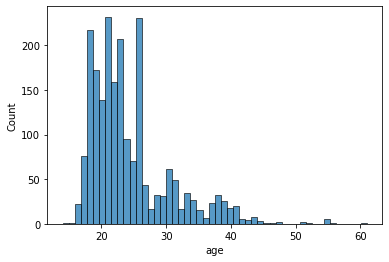

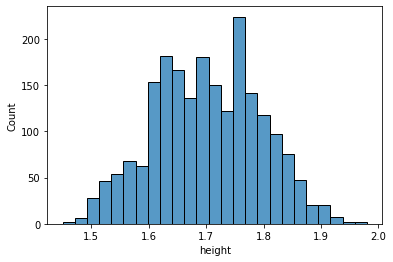

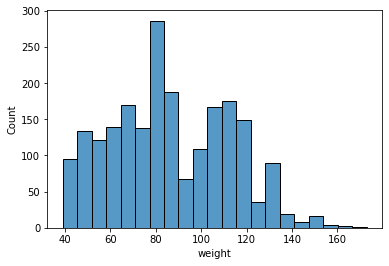

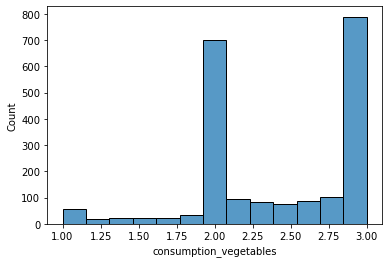

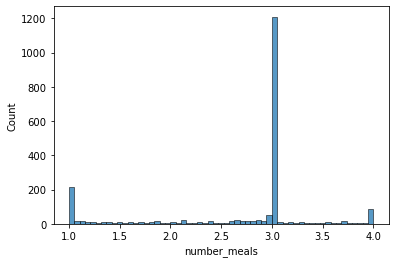

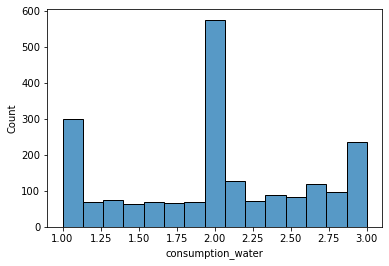

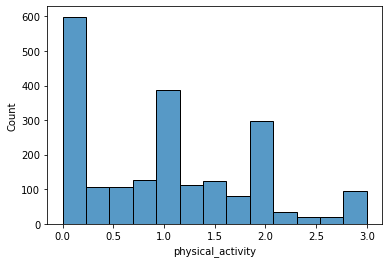

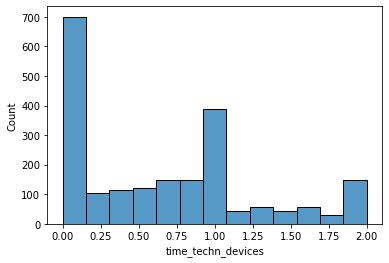

In [62]:
# make histplot for every numerical data

for col in cols_num:
    sns.histplot(df[col])
    plt.show()
    


Most of the distributions look plausibel. There seem to be only a few values with the age highter than 50. I check this.

In [63]:
# Check for ages above 50

count_u50 = df.loc[df['age']>50, 'age'].value_counts()

# Normalize count
display(count_u50/len(df))

55.000000    0.000947
52.000000    0.000474
61.000000    0.000474
51.000000    0.000474
56.000000    0.000474
55.246250    0.000474
50.832559    0.000474
55.137881    0.000474
55.022494    0.000474
Name: age, dtype: float64

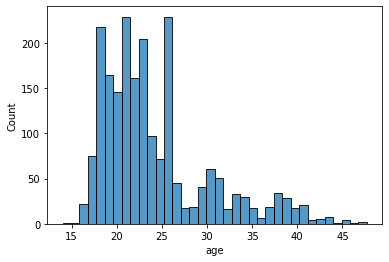

In [64]:
# So I delete all values higher as 50 years
df.drop(df[df['age']>50].index, inplace = True)
df = df.reset_index(drop=True)
                
# Check deletion
sns.histplot(df['age']);

Since weight and height are used to calculate the BMI and obtain the obesitiy classes they are of no use to predict the obesitiy classes (they define it). Both will be excluded from the features.

In [65]:
cols_num.remove('weight')
cols_num.remove('height')
cols_num

['age',
 'consumption_vegetables',
 'number_meals',
 'consumption_water',
 'physical_activity',
 'time_techn_devices']

## Explore categorical data

In [66]:
# have a look at the data
for col in cols_cat:
     # make entries all to lower
    df[col] = df[col].str.lower()
    # count values
    display(df[col].value_counts())

male      1061
female    1040
Name: gender, dtype: int64

yes    1719
no      382
Name: family_history_with_overweight, dtype: int64

yes    1859
no      242
Name: consumption_high_caloric_food, dtype: int64

sometimes     1757
frequently     241
always          52
no              51
Name: consumption_between_meals, dtype: int64

no     2060
yes      41
Name: smoke, dtype: int64

no     2007
yes      94
Name: calories_consumption_monitoring, dtype: int64

sometimes     1401
no             632
frequently      67
always           1
Name: consumption_alcohol, dtype: int64

public_transportation    1578
automobile                450
walking                    55
motorbike                  11
bike                        7
Name: transportation_used, dtype: int64

Data looks good. In column consumption_alcohol there is only one value "Always". So I change it to "Frequently".

Bike and Motorbike is seldom also. So I join "Walking" and "Bike" to one value, "Walking or Bike" and "Motorbike" with "Autommobile" with 

In [67]:
# Replace "Always" with "Frequently"

df['consumption_alcohol'].replace('always', 'frequently', inplace=True)

df['consumption_alcohol'].value_counts()

sometimes     1401
no             632
frequently      68
Name: consumption_alcohol, dtype: int64

In [68]:
# Replace "Bike" and 'Walking" with "Walking or Bike"

df['transportation_used'].replace({'bike': 'walk_or_bike', 'walking': 'walk_or_bike', 'automobile': 'automotive', 'motorbike': 'automotive'}, inplace=True)

df['transportation_used'].value_counts()

public_transportation    1578
automotive                461
walk_or_bike               62
Name: transportation_used, dtype: int64

## Explore target

In [69]:
# Have a look at target variable

df['nobeyesdad'].value_counts()

Obesity_Type_I         350
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     289
Normal_Weight          285
Overweight_Level_II    284
Insufficient_Weight    272
Name: nobeyesdad, dtype: int64

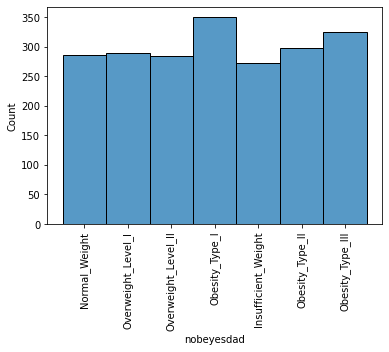

In [70]:
sns.histplot(df['nobeyesdad']);
plt.xticks(rotation =90);

Distribution of values looks good. Now I replace the values by numbers.

In [71]:
# Make values of target_variable to numbers

df['nobeyesdad'] = df['nobeyesdad'].map({'Obesity_Type_I': 4,
'Obesity_Type_III': 6,
'Obesity_Type_II' : 5,
'Overweight_Level_I': 2,
'Normal_Weight': 1,
'Overweight_Level_II': 3,
'Insufficient_Weight':  0}).astype(int)

# Check values
display(df['nobeyesdad'].value_counts())
df['nobeyesdad'].dtypes

4    350
6    324
5    297
2    289
1    285
3    284
0    272
Name: nobeyesdad, dtype: int64

dtype('int32')

## Split Dataset

In [72]:
# Define features
features_full = cols_cat + cols_num

#display(features_full)

In [73]:
# split dataset in training-, test- and validation-set

df_train_full, df_test = train_test_split(df[features_full+['nobeyesdad']], test_size = 0.2, random_state = 1)
df_train, df_val = train_test_split(df_train_full, test_size = 0.25, random_state=1)

In [74]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [75]:
# define target
y_train = (df_train['nobeyesdad']).values
y_val = (df_val['nobeyesdad']).values
y_test = (df_test['nobeyesdad']).values

In [76]:
del df_train['nobeyesdad']
del df_val['nobeyesdad']
del df_test['nobeyesdad']

## Feature importance of numerical data

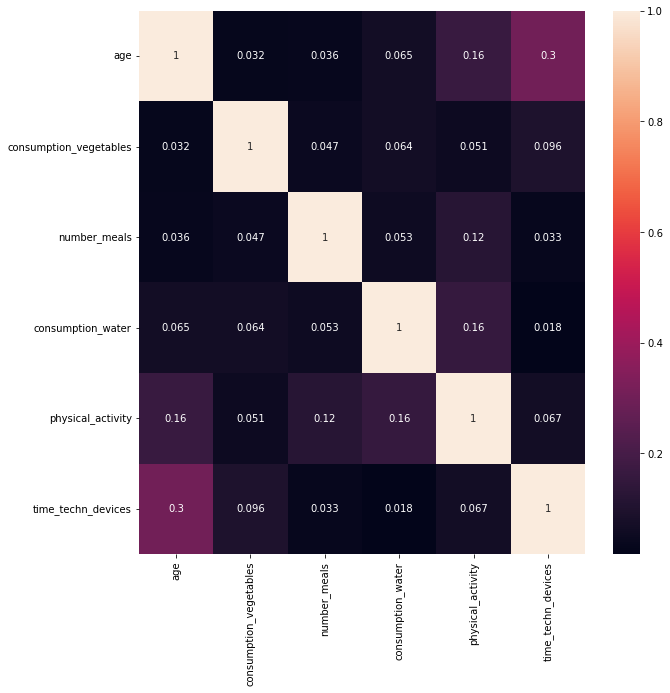

In [77]:
# Measure feature importance with correlation

#At first have a look at correlation, because of hightly correlated variables only one could be chosen
fig = plt.figure(figsize=(10,10))
sns.heatmap(df_train[cols_num].corr().abs(), annot=True);

There are no highly correlated variables. So all can be chosen.

In [78]:
# Calculate feature importance with Pearson Correlation Coeffizient
corr= []

corr = df_train[cols_num].corrwith(pd.Series(y_train))

display(corr.abs().sort_values(ascending=False))

age                       0.300970
consumption_vegetables    0.242850
physical_activity         0.210027
consumption_water         0.135010
time_techn_devices        0.118912
number_meals              0.034387
dtype: float64

From the numerical data age, consumption of vegetables and physical activity has the highest impact where as the influence of number of meals is low.

## Feature importance of categorical data

In [79]:
# Calculate feature importance of categorical data with mutual information

def mutual_info_score_target(series):
    return mutual_info_score(series, y_train)

mutual_info =[]

mutual_info = df_train[cols_cat].apply(mutual_info_score_target)

display(mutual_info.sort_values(ascending=False))


gender                             0.220599
family_history_with_overweight     0.152178
consumption_between_meals          0.151995
consumption_alcohol                0.099404
transportation_used                0.081017
consumption_high_caloric_food      0.074689
calories_consumption_monitoring    0.037661
smoke                              0.006225
dtype: float64

Smoke has low impact on obesity, where as gender, familiy history and consumption between meals seam to have the heighest impact.

## Transform data

In [80]:
# Transform training data
train_dicts = df_train[cols_num+cols_cat].to_dict(orient='records')

dv = DictVectorizer(sparse = False)
X_train = dv.fit_transform(train_dicts)


In [81]:
# Transform validation data
val_dicts = df_val[cols_num+cols_cat].to_dict(orient='records')
X_val = dv.transform(val_dicts)


## Train different models

The following models will be trained:
- Multiclass Logistic Regression
- Random Forest
- Gradient Booster

### Multiclass Logistic Regression

LogisticRegression has the following parameter. 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,

                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   
                   warm_start=False)

So parameter tuning can be done e.g. over C, penalty and tol.

In [82]:
# Search for best multiclass logistic regression modell

scores_lr = []

for p in ["l1", "l2"]:
    for t in np.linspace(0.001, 1.0, 10):
        for c in np.linspace(0.1, 1.0, 10):
            # fit model
            lr = LogisticRegression(C=c, multi_class = 'ovr', penalty = p, solver= 'liblinear', tol =t )
            lr.fit(X_train, y_train)
            
            # make predicition
            y_pred = lr.predict_proba(X_val)
            
            #Calculate Score
            auc = roc_auc_score(y_val, y_pred, multi_class='ovr')
            
            scores_lr.append((p, t, c,  auc))


In [83]:
# Display result of multiclass logistic regression
columns_lr = ['penalty', 'tol', 'C', 'auc']
df_scores_lr = pd.DataFrame(scores_lr, columns=columns_lr)

In [84]:
df_scores_lr_pivot1 = df_scores_lr[df_scores_lr['penalty']=="l1"].pivot(index='C', columns=['tol'], values=['auc'])

display("AUC for penalty = l1:", df_scores_lr_pivot1.round(3))

'AUC for penalty = l1:'

auc                                                               
tol  0.001  0.112  0.223  0.334  0.445  0.556  0.667  0.778  0.889  1.000
C                                                                        
0.1  0.851  0.844  0.825  0.811  0.813  0.816  0.817  0.823  0.802  0.808
0.2  0.860  0.836  0.835  0.826  0.822  0.814  0.814  0.822  0.817  0.817
0.3  0.865  0.851  0.836  0.840  0.834  0.827  0.827  0.825  0.811  0.809
0.4  0.867  0.853  0.851  0.826  0.827  0.829  0.808  0.819  0.834  0.836
0.5  0.869  0.852  0.836  0.843  0.843  0.840  0.829  0.797  0.827  0.836
0.6  0.870  0.858  0.845  0.834  0.845  0.837  0.840  0.837  0.828  0.830
0.7  0.871  0.855  0.841  0.840  0.828  0.832  0.824  0.833  0.832  0.830
0.8  0.872  0.855  0.852  0.830  0.839  0.823  0.835  0.828  0.817  0.826
0.9  0.872  0.849  0.846  0.839  0.826  0.830  0.822  0.827  0.836  0.821
1.0  0.872  0.853  0.850  0.840  0.840  0.825  0.819  0.830  0.825  0.832

In [85]:
df_scores_lr_pivot2 = df_scores_lr[df_scores_lr['penalty']=="l2"].pivot(index='C', columns=['tol'], values=['auc'])

display("AUC for penalty = l2:", df_scores_lr_pivot2.round(3))

'AUC for penalty = l2:'

auc                                                               
tol  0.001  0.112  0.223  0.334  0.445  0.556  0.667  0.778  0.889  1.000
C                                                                        
0.1  0.859  0.818  0.739  0.733  0.733  0.733  0.733  0.733  0.724  0.659
0.2  0.865  0.817  0.739  0.733  0.733  0.733  0.733  0.733  0.724  0.659
0.3  0.867  0.819  0.739  0.733  0.733  0.733  0.733  0.733  0.724  0.659
0.4  0.868  0.819  0.739  0.733  0.733  0.733  0.733  0.733  0.724  0.659
0.5  0.869  0.819  0.739  0.733  0.733  0.733  0.733  0.733  0.724  0.659
0.6  0.870  0.819  0.739  0.733  0.733  0.733  0.733  0.733  0.724  0.659
0.7  0.871  0.819  0.739  0.733  0.733  0.733  0.733  0.733  0.724  0.659
0.8  0.871  0.819  0.739  0.733  0.733  0.733  0.733  0.733  0.724  0.659
0.9  0.871  0.819  0.739  0.733  0.733  0.733  0.733  0.733  0.724  0.659
1.0  0.872  0.819  0.739  0.733  0.733  0.733  0.733  0.733  0.724  0.659

In average the results are better for penalty = 'l2'. The best accuracy for both model is 0.,872, which is with tol = 0.001 and C = 1.0.

### Random Forest Decision Tree

In [86]:
# Search for best Random Forest Decision Tree

scores_rf = []

for d in [5, 10, 15]:
    for s in [0.01, 1, 3, 5, 10, 50]:
        for n in range(10, 201, 10):
            # Fit modell
            rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    min_samples_leaf=s,
                                    random_state=1)
            rf.fit(X_train, y_train)
        
            # make prediction
            y_pred = rf.predict_proba(X_val)
        
            # calculate score
            auc = roc_auc_score(y_val, y_pred, multi_class='ovr')

            scores_rf.append((d, s, n, auc))

In [87]:
# Display results of Rain Forest Decision Tree        
columns_rf = ['max_depth','min_samples_leaf', 'n_estimators', 'auc']
df_scores_rf = pd.DataFrame(scores_rf, columns=columns_rf)

In [88]:
df_scores_rf_pivot1 = df_scores_rf[df_scores_rf['max_depth']==5].pivot(index='n_estimators', columns=['min_samples_leaf'], values=['auc'])

display("AUC for max_depth = 5:", df_scores_rf_pivot1.round(3))

'AUC for max_depth = 5:'

auc                                   
min_samples_leaf  0.01   1.00   3.00   5.00   10.00  50.00
n_estimators                                              
10                0.915  0.921  0.918  0.917  0.916  0.885
20                0.922  0.929  0.925  0.922  0.924  0.893
30                0.925  0.932  0.929  0.925  0.929  0.896
40                0.929  0.935  0.931  0.927  0.931  0.895
50                0.927  0.936  0.933  0.928  0.931  0.898
60                0.927  0.937  0.934  0.930  0.931  0.898
70                0.926  0.936  0.934  0.931  0.930  0.898
80                0.927  0.936  0.934  0.931  0.930  0.897
90                0.927  0.936  0.934  0.932  0.929  0.899
100               0.927  0.935  0.934  0.932  0.929  0.898
110               0.927  0.936  0.935  0.932  0.929  0.896
120               0.927  0.935  0.934  0.932  0.929  0.896
130               0.927  0.935  0.934  0.933  0.929  0.897
140               0.928  0.935  0.934  0.933  0.929  0.896
150               0.927  0.935  0.934  0.934  0.929  0.897
160               0.927  0.935  0.933  0.933  0.929  0.897
170               0.927  0.935  0.933  0.934  0.930  0.898
180               0.927  0.935  0.933  0.934  0.930  0.897
190               0.927  0.936  0.934  0.934  0.930  0.898
200               0.927  0.935  0.934  0.934  0.930  0.898

In [89]:
df_scores_rf_pivot2 = df_scores_rf[df_scores_rf['max_depth']==10].pivot(index='n_estimators', columns=['min_samples_leaf'], values=['auc'])

display("AUC for max_depth = 10:", df_scores_rf_pivot2.round(3))

'AUC for max_depth = 10:'

auc                                   
min_samples_leaf  0.01   1.00   3.00   5.00   10.00  50.00
n_estimators                                              
10                0.935  0.949  0.951  0.943  0.933  0.890
20                0.936  0.956  0.955  0.951  0.937  0.894
30                0.940  0.959  0.957  0.952  0.941  0.898
40                0.940  0.963  0.958  0.953  0.942  0.897
50                0.941  0.965  0.959  0.953  0.945  0.898
60                0.940  0.966  0.959  0.954  0.946  0.899
70                0.940  0.967  0.958  0.953  0.946  0.899
80                0.940  0.967  0.960  0.955  0.947  0.898
90                0.941  0.967  0.960  0.955  0.948  0.900
100               0.942  0.967  0.960  0.955  0.947  0.899
110               0.942  0.966  0.960  0.955  0.948  0.897
120               0.941  0.966  0.961  0.955  0.947  0.897
130               0.942  0.966  0.960  0.956  0.947  0.897
140               0.942  0.967  0.960  0.957  0.947  0.898
150               0.941  0.967  0.961  0.957  0.946  0.898
160               0.941  0.967  0.961  0.957  0.947  0.898
170               0.942  0.967  0.961  0.957  0.947  0.898
180               0.942  0.967  0.961  0.957  0.947  0.899
190               0.942  0.967  0.962  0.957  0.947  0.899
200               0.942  0.968  0.963  0.957  0.947  0.899

In [90]:
df_scores_rf_pivot3 = df_scores_rf[df_scores_rf['max_depth']==15].pivot(index='n_estimators', columns=['min_samples_leaf'], values=['auc'])

display("AUC for max_depth = 15:", df_scores_rf_pivot3.round(3))

'AUC for max_depth = 15:'

auc                                   
min_samples_leaf  0.01   1.00   3.00   5.00   10.00  50.00
n_estimators                                              
10                0.936  0.944  0.948  0.942  0.936  0.890
20                0.936  0.957  0.955  0.952  0.936  0.894
30                0.941  0.966  0.959  0.955  0.943  0.898
40                0.940  0.966  0.960  0.956  0.944  0.897
50                0.941  0.968  0.960  0.956  0.945  0.898
60                0.940  0.968  0.962  0.956  0.946  0.899
70                0.940  0.969  0.962  0.957  0.946  0.899
80                0.941  0.969  0.963  0.957  0.947  0.898
90                0.942  0.970  0.964  0.958  0.948  0.900
100               0.942  0.970  0.964  0.958  0.948  0.899
110               0.943  0.970  0.964  0.958  0.948  0.897
120               0.942  0.970  0.964  0.957  0.948  0.897
130               0.942  0.971  0.964  0.957  0.947  0.897
140               0.942  0.972  0.964  0.958  0.947  0.898
150               0.941  0.972  0.964  0.958  0.947  0.898
160               0.941  0.972  0.964  0.957  0.947  0.898
170               0.942  0.972  0.965  0.957  0.947  0.898
180               0.942  0.972  0.965  0.957  0.947  0.899
190               0.942  0.972  0.965  0.957  0.947  0.899
200               0.943  0.972  0.965  0.958  0.947  0.899

The accuracy of Random Forest is better than with multiclass logistic regression. The best accuracy is 0.972. It is with max_depth = 15, min_samples_leaf = 1 and n_estimators = 140.

### Gradient Boost

In [91]:
# Search for best XGBoost
# eta
# max_depth
# min_child_weight
features = list(dv.get_feature_names_out())

dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [92]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [107]:
#%%capture output

scores_xgb=[]

for e in [0.01, 0.1, 0.3]:
    for d in [3, 4, 6, 10]:
        for s in [1, 10, 30]:
            # set parameter
            xgb_params = {'eta': e, 
            'max_depth': d,
            'min_child_weight': s,
    
            'objective': 'multi:softprob',
            'num_class': 7,
            'eval_metric': 'auc',

            'nthread': 8,
            'seed': 1,
            'verbosity': 1,
            }
             # train model
            model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)
        
            # make predictions
            y_pred = model.predict(dval)
        
            # calculate score
            auc = roc_auc_score(y_val, y_pred, multi_class='ovr')             

            scores_xgb.append((e, d, s, auc))

[0]	train-auc:0.89661	val-auc:0.86460
[5]	train-auc:0.89843	val-auc:0.86766
[10]	train-auc:0.90012	val-auc:0.87005
[15]	train-auc:0.90124	val-auc:0.87056
[20]	train-auc:0.90326	val-auc:0.87332
[25]	train-auc:0.90682	val-auc:0.87666
[30]	train-auc:0.91128	val-auc:0.88006
[35]	train-auc:0.91412	val-auc:0.88261
[40]	train-auc:0.91667	val-auc:0.88604
[45]	train-auc:0.92362	val-auc:0.89003
[50]	train-auc:0.92739	val-auc:0.89242
[55]	train-auc:0.92972	val-auc:0.89437
[60]	train-auc:0.93130	val-auc:0.89537
[65]	train-auc:0.93262	val-auc:0.89647
[70]	train-auc:0.93450	val-auc:0.89728
[75]	train-auc:0.93548	val-auc:0.89827
[80]	train-auc:0.93673	val-auc:0.89919
[85]	train-auc:0.93783	val-auc:0.90016
[90]	train-auc:0.93862	val-auc:0.90058
[95]	train-auc:0.93986	val-auc:0.90146
[100]	train-auc:0.94150	val-auc:0.90332
[105]	train-auc:0.94296	val-auc:0.90441
[110]	train-auc:0.94435	val-auc:0.90592
[115]	train-auc:0.94561	val-auc:0.90681
[120]	train-auc:0.94673	val-auc:0.90775
[125]	train-auc:0.9476

[25]	train-auc:0.93897	val-auc:0.89612
[30]	train-auc:0.94085	val-auc:0.89782
[35]	train-auc:0.94265	val-auc:0.89920
[40]	train-auc:0.94508	val-auc:0.90169
[45]	train-auc:0.94762	val-auc:0.90463
[50]	train-auc:0.94944	val-auc:0.90634
[55]	train-auc:0.95129	val-auc:0.90814
[60]	train-auc:0.95287	val-auc:0.91062
[65]	train-auc:0.95471	val-auc:0.91359
[70]	train-auc:0.95657	val-auc:0.91619
[75]	train-auc:0.95815	val-auc:0.91832
[80]	train-auc:0.95967	val-auc:0.91958
[85]	train-auc:0.96099	val-auc:0.92094
[90]	train-auc:0.96246	val-auc:0.92247
[95]	train-auc:0.96383	val-auc:0.92408
[100]	train-auc:0.96500	val-auc:0.92550
[105]	train-auc:0.96614	val-auc:0.92671
[110]	train-auc:0.96719	val-auc:0.92779
[115]	train-auc:0.96813	val-auc:0.92858
[120]	train-auc:0.96908	val-auc:0.92931
[125]	train-auc:0.96991	val-auc:0.93004
[130]	train-auc:0.97082	val-auc:0.93100
[135]	train-auc:0.97181	val-auc:0.93222
[140]	train-auc:0.97264	val-auc:0.93314
[145]	train-auc:0.97341	val-auc:0.93404
[150]	train-auc

[40]	train-auc:0.98700	val-auc:0.94810
[45]	train-auc:0.98871	val-auc:0.95044
[50]	train-auc:0.99039	val-auc:0.95213
[55]	train-auc:0.99155	val-auc:0.95352
[60]	train-auc:0.99280	val-auc:0.95524
[65]	train-auc:0.99372	val-auc:0.95644
[70]	train-auc:0.99483	val-auc:0.95742
[75]	train-auc:0.99556	val-auc:0.95809
[80]	train-auc:0.99606	val-auc:0.95851
[85]	train-auc:0.99664	val-auc:0.95899
[90]	train-auc:0.99708	val-auc:0.95946
[95]	train-auc:0.99744	val-auc:0.95962
[100]	train-auc:0.99779	val-auc:0.95979
[105]	train-auc:0.99808	val-auc:0.95991
[110]	train-auc:0.99839	val-auc:0.96006
[115]	train-auc:0.99855	val-auc:0.95959
[120]	train-auc:0.99877	val-auc:0.95998
[125]	train-auc:0.99894	val-auc:0.95994
[130]	train-auc:0.99904	val-auc:0.95998
[135]	train-auc:0.99917	val-auc:0.96045
[140]	train-auc:0.99925	val-auc:0.96044
[145]	train-auc:0.99933	val-auc:0.96025
[150]	train-auc:0.99940	val-auc:0.96028
[155]	train-auc:0.99947	val-auc:0.96025
[160]	train-auc:0.99953	val-auc:0.96041
[165]	train-

[55]	train-auc:0.96454	val-auc:0.93068
[60]	train-auc:0.96649	val-auc:0.93232
[65]	train-auc:0.96833	val-auc:0.93418
[70]	train-auc:0.96993	val-auc:0.93560
[75]	train-auc:0.97120	val-auc:0.93675
[80]	train-auc:0.97239	val-auc:0.93786
[85]	train-auc:0.97328	val-auc:0.93850
[90]	train-auc:0.97407	val-auc:0.93940
[95]	train-auc:0.97496	val-auc:0.94002
[100]	train-auc:0.97558	val-auc:0.94024
[105]	train-auc:0.97615	val-auc:0.94045
[110]	train-auc:0.97679	val-auc:0.94083
[115]	train-auc:0.97748	val-auc:0.94157
[120]	train-auc:0.97795	val-auc:0.94205
[125]	train-auc:0.97843	val-auc:0.94219
[130]	train-auc:0.97888	val-auc:0.94261
[135]	train-auc:0.97928	val-auc:0.94282
[140]	train-auc:0.97978	val-auc:0.94269
[145]	train-auc:0.98017	val-auc:0.94309
[150]	train-auc:0.98052	val-auc:0.94327
[155]	train-auc:0.98087	val-auc:0.94341
[160]	train-auc:0.98120	val-auc:0.94353
[165]	train-auc:0.98146	val-auc:0.94365
[170]	train-auc:0.98183	val-auc:0.94402
[175]	train-auc:0.98213	val-auc:0.94428
[180]	tra

[70]	train-auc:0.99421	val-auc:0.95605
[75]	train-auc:0.99473	val-auc:0.95693
[80]	train-auc:0.99533	val-auc:0.95755
[85]	train-auc:0.99576	val-auc:0.95801
[90]	train-auc:0.99611	val-auc:0.95791
[95]	train-auc:0.99646	val-auc:0.95749
[100]	train-auc:0.99681	val-auc:0.95756
[105]	train-auc:0.99704	val-auc:0.95768
[110]	train-auc:0.99724	val-auc:0.95760
[115]	train-auc:0.99746	val-auc:0.95767
[120]	train-auc:0.99761	val-auc:0.95792
[125]	train-auc:0.99778	val-auc:0.95794
[130]	train-auc:0.99794	val-auc:0.95800
[135]	train-auc:0.99803	val-auc:0.95815
[140]	train-auc:0.99809	val-auc:0.95835
[145]	train-auc:0.99823	val-auc:0.95790
[150]	train-auc:0.99834	val-auc:0.95800
[155]	train-auc:0.99845	val-auc:0.95804
[160]	train-auc:0.99850	val-auc:0.95769
[165]	train-auc:0.99857	val-auc:0.95768
[170]	train-auc:0.99867	val-auc:0.95743
[175]	train-auc:0.99876	val-auc:0.95763
[180]	train-auc:0.99881	val-auc:0.95751
[185]	train-auc:0.99882	val-auc:0.95751
[190]	train-auc:0.99889	val-auc:0.95743
[195]	

[85]	train-auc:1.00000	val-auc:0.96729
[90]	train-auc:1.00000	val-auc:0.96704
[95]	train-auc:1.00000	val-auc:0.96692
[100]	train-auc:1.00000	val-auc:0.96713
[105]	train-auc:1.00000	val-auc:0.96714
[110]	train-auc:1.00000	val-auc:0.96698
[115]	train-auc:1.00000	val-auc:0.96706
[120]	train-auc:1.00000	val-auc:0.96688
[125]	train-auc:1.00000	val-auc:0.96683
[130]	train-auc:1.00000	val-auc:0.96661
[135]	train-auc:1.00000	val-auc:0.96639
[140]	train-auc:1.00000	val-auc:0.96628
[145]	train-auc:1.00000	val-auc:0.96619
[150]	train-auc:1.00000	val-auc:0.96612
[155]	train-auc:1.00000	val-auc:0.96610
[160]	train-auc:1.00000	val-auc:0.96606
[165]	train-auc:1.00000	val-auc:0.96608
[170]	train-auc:1.00000	val-auc:0.96600
[175]	train-auc:1.00000	val-auc:0.96596
[180]	train-auc:1.00000	val-auc:0.96581
[185]	train-auc:1.00000	val-auc:0.96571
[190]	train-auc:1.00000	val-auc:0.96568
[195]	train-auc:1.00000	val-auc:0.96576
[199]	train-auc:1.00000	val-auc:0.96576
[0]	train-auc:0.92630	val-auc:0.88940
[5]	t

[100]	train-auc:0.98701	val-auc:0.94955
[105]	train-auc:0.98747	val-auc:0.95029
[110]	train-auc:0.98774	val-auc:0.94990
[115]	train-auc:0.98799	val-auc:0.94996
[120]	train-auc:0.98844	val-auc:0.95020
[125]	train-auc:0.98862	val-auc:0.95038
[130]	train-auc:0.98891	val-auc:0.95056
[135]	train-auc:0.98921	val-auc:0.95095
[140]	train-auc:0.98938	val-auc:0.95131
[145]	train-auc:0.98965	val-auc:0.95099
[150]	train-auc:0.98984	val-auc:0.95084
[155]	train-auc:0.98998	val-auc:0.95104
[160]	train-auc:0.99017	val-auc:0.95105
[165]	train-auc:0.99032	val-auc:0.95100
[170]	train-auc:0.99052	val-auc:0.95126
[175]	train-auc:0.99067	val-auc:0.95164
[180]	train-auc:0.99082	val-auc:0.95161
[185]	train-auc:0.99089	val-auc:0.95154
[190]	train-auc:0.99103	val-auc:0.95160
[195]	train-auc:0.99112	val-auc:0.95142
[199]	train-auc:0.99122	val-auc:0.95138


In [109]:
# Display results of Rain Forest Decision Tree        
columns_xgb = ['eta','max_depth', 'min_child_weight', 'auc']
df_scores_xgb = pd.DataFrame(scores_xgb, columns=columns_xgb)

In [110]:
df_scores_xgb_pivot1 = df_scores_xgb[df_scores_xgb['min_child_weight']==1].pivot(index='max_depth', columns=['eta'], values=['auc'])

display("AUC for min_child_weight = 1:", df_scores_xgb_pivot1.round(3))

'AUC for min_child_weight = 1:'

auc              
eta         0.01   0.10   0.30
max_depth                     
3          0.924  0.956  0.959
4          0.939  0.961  0.962
6          0.949  0.967  0.966
10         0.956  0.966  0.965

In [111]:
df_scores_xgb_pivot2 = df_scores_xgb[df_scores_xgb['min_child_weight']==10].pivot(index='max_depth', columns=['eta'], values=['auc'])

display("AUC for min_child_weight = 10:", df_scores_xgb_pivot2.round(3))

'AUC for min_child_weight = 10:'

auc              
eta         0.01   0.10   0.30
max_depth                     
3          0.920  0.957  0.958
4          0.930  0.960  0.959
6          0.939  0.961  0.959
10         0.943  0.961  0.959

In [112]:
df_scores_xgb_pivot3 = df_scores_xgb[df_scores_xgb['min_child_weight']==30].pivot(index='max_depth', columns=['eta'], values=['auc'])

display("AUC for min_child_weight = 30:", df_scores_xgb_pivot3.round(3))

'AUC for min_child_weight = 30:'

auc              
eta         0.01   0.10   0.30
max_depth                     
3          0.905  0.947  0.949
4          0.908  0.947  0.950
6          0.909  0.947  0.953
10         0.909  0.947  0.953

The accuracy of XGBoost Random Forest is better than with multiclass logistic regression, but worser than with Random Forest. The best accuracy is 0.967. It is with max_depth = 6, min_child_weight = 1 and eta = 0.1.

## Select the final model

### Multiclass logistic regression

In [115]:
lr = LogisticRegression(C=1, multi_class = 'ovr', penalty = 'l2', solver= 'liblinear', tol =0.001 )

lr.fit(X_train, y_train)            

LogisticRegression(C=1, multi_class='ovr', solver='liblinear', tol=0.001)

In [117]:
# make predicition
y_pred = lr.predict_proba(X_val)
            
#Calculate Score
auc = roc_auc_score(y_val, y_pred, multi_class='ovr')

display('AUC for multiclass logistic regression:', auc)

'AUC for multiclass logistic regression:'

0.8716315128329803

### Random forest

In [118]:
rf = RandomForestClassifier(n_estimators=140,
                                max_depth=15,
                                min_samples_leaf=1,
                                random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, n_estimators=140, random_state=1)

In [119]:
# make predicition
y_pred = rf.predict_proba(X_val)
            
#Calculate Score
auc = roc_auc_score(y_val, y_pred, multi_class='ovr')

display('AUC for Radom Forest:', auc)

'AUC for Radom Forest:'

0.9718518979153178

### Gradient Boost

In [122]:
xgb_params = {'eta': 0.1, 
            'max_depth': 6,
            'min_child_weight': 1,
    
            'objective': 'multi:softprob',
            'num_class': 7,
            'eval_metric': 'auc',

            'nthread': 8,
            'seed': 1,
            'verbosity': 1,
            }
             
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
            verbose_eval=5,
            evals=watchlist)         

[0]	train-auc:0.96451	val-auc:0.90198
[5]	train-auc:0.97823	val-auc:0.93007
[10]	train-auc:0.98479	val-auc:0.93807
[15]	train-auc:0.98983	val-auc:0.94312
[20]	train-auc:0.99343	val-auc:0.94994
[25]	train-auc:0.99565	val-auc:0.95459
[30]	train-auc:0.99726	val-auc:0.95866
[35]	train-auc:0.99819	val-auc:0.96018
[40]	train-auc:0.99874	val-auc:0.96078
[45]	train-auc:0.99908	val-auc:0.96127
[50]	train-auc:0.99940	val-auc:0.96276
[55]	train-auc:0.99956	val-auc:0.96332
[60]	train-auc:0.99968	val-auc:0.96358
[65]	train-auc:0.99976	val-auc:0.96390
[70]	train-auc:0.99984	val-auc:0.96430
[75]	train-auc:0.99989	val-auc:0.96457
[80]	train-auc:0.99993	val-auc:0.96491
[85]	train-auc:0.99995	val-auc:0.96532
[90]	train-auc:0.99996	val-auc:0.96527
[95]	train-auc:0.99998	val-auc:0.96506
[100]	train-auc:0.99999	val-auc:0.96499
[105]	train-auc:1.00000	val-auc:0.96517
[110]	train-auc:1.00000	val-auc:0.96505
[115]	train-auc:1.00000	val-auc:0.96504
[120]	train-auc:1.00000	val-auc:0.96484
[125]	train-auc:1.0000

In [123]:
 # make predictions
y_pred = model.predict(dval)

#Calculate Score
auc = roc_auc_score(y_val, y_pred, multi_class='ovr')

display('AUC for Gradient Boost:', auc)

'AUC for Gradient Boost:'

0.9667726050501725

The final model ist Random Forest with the parameters n_estimators=140, max_depth=15 and min_samples_leaf=1.

### Training the final model

In [124]:
df_train_full = df_train_full.reset_index(drop=True)

In [125]:
y_train_full = (df_train_full['nobeyesdad']).values

In [126]:
del df_train_full['nobeyesdad']

In [128]:
dicts_train_full = df_train_full.to_dict(orient='records')

dv = DictVectorizer(sparse=False)

X_train_full = dv.fit_transform(dicts_train_full)

dicts_test = df_test.to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [129]:
rf = RandomForestClassifier(n_estimators=140,
                                max_depth=15,
                                min_samples_leaf=1,
                                random_state=1)
rf.fit(X_train_full, y_train_full)

RandomForestClassifier(max_depth=15, n_estimators=140, random_state=1)

In [130]:
# make predicition
y_pred = rf.predict_proba(X_test)
            
#Calculate Score
auc = roc_auc_score(y_test, y_pred, multi_class='ovr')

display('AUC for Radom Forest after full training:', auc)

'AUC for Radom Forest after full training:'

0.9774851627375218